In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import cufflinks as cf
%matplotlib inline

In [191]:
titanic_data = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

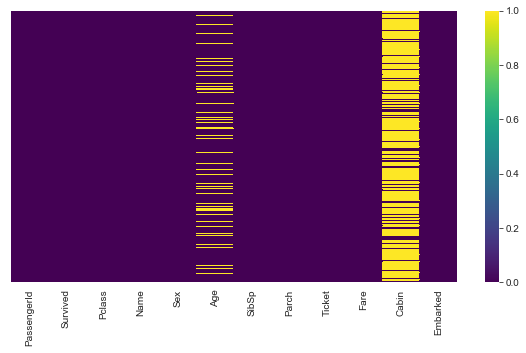

In [193]:
plt.figure(figsize=(10,5))
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='viridis')

In [194]:
null_in_cabin_perc = titanic_data['Cabin'].isna().sum()/len(titanic_data['Cabin']) #78%

In [195]:
null_in_age_perc = titanic_data['Age'].isna().sum()/len(titanic_data['Age']) #20%

**CABIN NULL VALUES ACCOUNT TO 78%, SO THE COLUMN CAN BE DROPPED**

**AGE NULL VALUES ACCOUNT TO 20%, SO THE COLUMN CAN BE FILLED LOGICALLY**

In [196]:
titanic_data.drop('Cabin',axis=1,inplace=True)

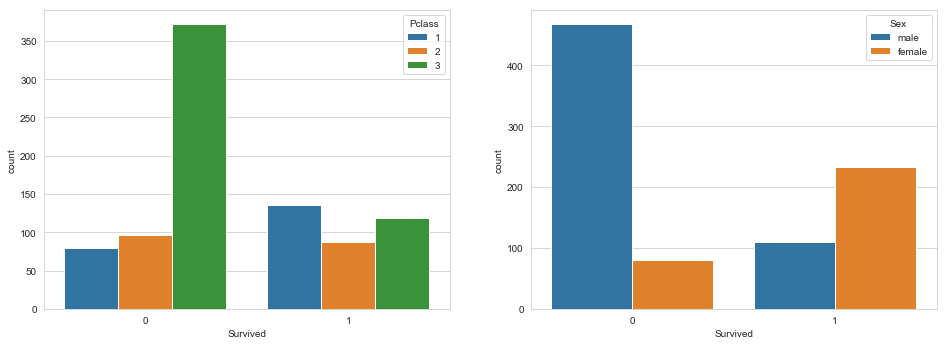

In [197]:
plt.figure(figsize=(16,5.5))
sns.set_style('whitegrid')
plt.subplot(121)
sns.countplot(x='Survived',data=titanic_data,hue='Pclass')
plt.subplot(122)
sns.countplot(x='Survived',data=titanic_data,hue='Sex')
plt.show()

**AS WE CAN SEE SURVIVAL RATE MOST LIKELY IS AFFECTED BY THE PCLASS AS WELL OF THE SEX OF THE PERSON**

*SINCE THE PASSENGERID, NAME, TICKET, FARE AND EMBARKED DOES NOT AFFECT THE SURVIVAL RATE, THEY CAN BE DROPPED*

In [198]:
titanic_data.drop(['Name','Ticket','Fare','Embarked'],axis=1,inplace=True)

*SINCE THERE ARE ONLY TWO 'SEX' -> MALE AND FEMALE, WE WILL CREATE A NEW COLUMN TO HOLD THE BINARY VALUES RESPECTIVE TO THE GENDER*


In [199]:
titanic_data['sex'] = pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [200]:
#Sex can now be dropped
titanic_data.drop('Sex',axis = 1,inplace=True)

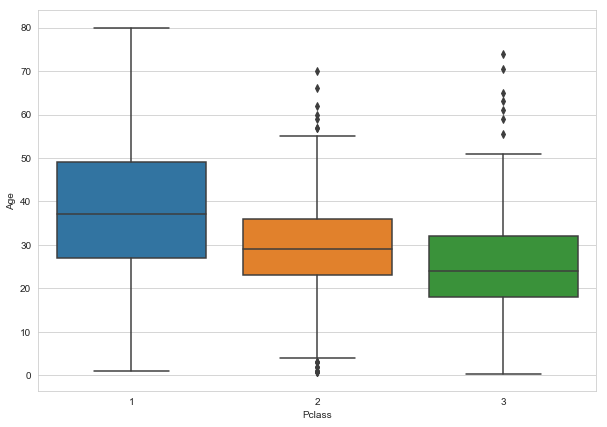

In [201]:
#Filling the age logically
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic_data)

In [202]:
def fill(col):
    age = col[0]
    pc = col[1]
    if pd.isnull(age):
        if pc==1:return 37
        elif pc==2:return 29
        else:return 24
    else:return age
titanic_data['Age'] = titanic_data[['Age','Pclass']].apply(fill,axis = 1)

In [204]:
titanic_data.drop('PassengerId',axis = 1,inplace = True)

In [205]:
scale = StandardScaler()
scale.fit(titanic_data.drop('Survived',axis = 1))
titanic_scale = scale.transform(titanic_data.drop('Survived',axis = 1))

/home/abhilash/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



In [206]:
X,y = titanic_scale,titanic_data['Survived']

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [208]:
knn = KNeighborsClassifier(n_neighbors=1)

In [209]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [210]:
pred = knn.predict(X_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       158
           1       0.72      0.75      0.73       110

   micro avg       0.78      0.78      0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



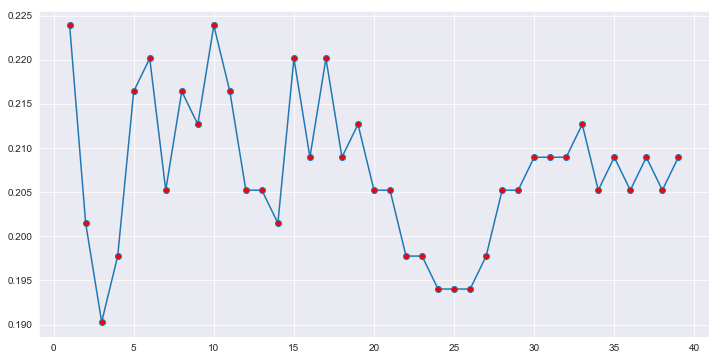

In [211]:
error = list()
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predi = knn.predict(X_test)
    error.append(np.mean(predi!=y_test))
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.plot(range(1,40),error,marker='o',markerfacecolor='red')

In [212]:
#The least error is at n_neighbors = 3
#Resetting the value
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
predi = knn.predict(X_test)

In [213]:
print(classification_report(predi,y_test))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       171
           1       0.70      0.82      0.76        97

   micro avg       0.81      0.81      0.81       268
   macro avg       0.80      0.81      0.80       268
weighted avg       0.82      0.81      0.81       268



**ACCURACY OF PREDICTION INCREASED FROM 78% TO 82%**

**SINCE WE HAVE 82% ACCURACY, LET US NOW WORK ON THE TEST CSV FILE**

In [214]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [215]:
test.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis = 1,inplace=True)

In [216]:
def fill2(col):
    age = col[0]
    pc = col[1]
    if pd.isnull(age):
        if pc==1:return 37
        elif pc==2:return 29
        else:return 24
    else:return age
test['Age'] = test[['Age','Pclass']].apply(fill2,axis = 1)
test['sex'] = pd.get_dummies(test['Sex'],drop_first=True)
test.drop('Sex',axis = 1,inplace=True)

In [220]:
test.head()

,Pclass,Age,SibSp,Parch,sex
0,3,34.5,0,0,1
1,3,47.0,1,0,0
2,2,62.0,0,0,1
3,3,27.0,0,0,1
4,3,22.0,1,1,0


In [285]:
X_train = titanic_data.drop('Survived',axis = 1)
y_train = titanic_data['Survived']

lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
lr_score = lr.score(X_train,y_train)*100

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred1 = knn.predict(test)
knn_score = knn.score(X_train,y_train)*100

svc = SVC(gamma='scale')
svc.fit(X_train,y_train)
pred2 = svc.predict(test)
svc_score = svc.score(X_train,y_train)*100

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
pred3 = rfc.predict(test)
rfc_score = rfc.score(X_train,y_train)*100

gvb = GaussianNB()
gvb.fit(X_train,y_train)
pred5 = gvb.predict(test)
gvb_score = gvb.score(X_train,y_train)*100

print(lr_score)
print(knn_score)
print(svc_score)
print(rfc_score)
print(gvb_score)

80.5836139169
85.746352413
81.9304152637
91.8069584736
77.5533108866


/home/abhilash/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [293]:
#As we can see, RandomForestClassifier Provides Greater Accuracy
final = pd.concat([pd.read_csv('titanic_test.csv'),pd.DataFrame(pred3,columns=['Survived'])],axis = 1)

In [294]:
final

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0
